In [1]:
%matplotlib inline
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
pd.options.display.max_rows = 200

plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('font', size=20)



# Loading Dataset

## IOT Devices

The dataset has been extracted at `ROOT_PATH`, containing the data for each IOT device. There are 9 devices in total. There are folders for each IOT device containing `benign_traffic.csv` and further two folders for `gafgyt_attacks` and `mirai_attacks`

In [3]:
ROOT_PATH = r'/mnt/data/khiz/dataset/00442'

IOT_DEVS = [ 'Danmini_Doorbell',
             'Ecobee_Thermostat',
             'Ennio_Doorbell',
             'B120N10_Baby_Mon',
             '737E_Security_Cam',
             '838_Security_Cam',
             'Samsung_Webcam',
             '1002_Security_Cam',
             '1003_Security_Cam'
           ]

## Paths to CSVs
We create a python dictionary that contains all the paths to the CSVs for the respective IOT devices

In [4]:
PATHS_DICT = {}

for i in IOT_DEVS:
    PATHS_DICT[i] = {}
    print('[' + i + ']')
    iot_dir = os.path.join(ROOT_PATH, i)
    PATHS_DICT[i]['benign'] = os.path.join(iot_dir, 'benign_traffic.csv')
    print('  ', 'benign_traffic.csv')
    attacks = [ d for d in os.listdir(iot_dir)
                   if os.path.isdir( os.path.join(iot_dir, d)) ]
    for attack in attacks:
        attack_name = attack.split('_')[0]
        
        PATHS_DICT[i][attack_name] = {}
        attack_dir = os.path.join(iot_dir, attack)
        types = [ f for f in os.listdir(attack_dir)
                   if os.path.isfile( os.path.join(attack_dir, f)) ]
        print('  ', attack_name, ': ', types)
        for t in types:
            type_name = t.split('.')[0]
            PATHS_DICT[i][attack_name][type_name] = os.path.join(attack_dir,t)

[Danmini_Doorbell]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[Ecobee_Thermostat]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[Ennio_Doorbell]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
[B120N10_Baby_Mon]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[737E_Security_Cam]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.csv', 'scan.csv', 'syn.csv', 'udp.csv', 'udpplain.csv']
[838_Security_Cam]
   benign_traffic.csv
   gafgyt :  ['combo.csv', 'junk.csv', 'scan.csv', 'tcp.csv', 'udp.csv']
   mirai :  ['ack.cs

## Loading CSVs into Pandas
Loading CSVs into pandas, adding four columns:
- `iot_dev`      : Name of IOT device
- `traffic_type` : benign or attack (0 or 1)
- `botnet`       : mirai or gafgyt
- `attack_type`  : type of attack e.g, ack, scan etc.

In [5]:
nbaiot = pd.DataFrame()
for iot_dev in PATHS_DICT:
    iot_dev_name = ' '. join(iot_dev.split('_'))
    df = pd.read_csv(PATHS_DICT[iot_dev]['benign'])
    df['traffic_type'] = 'benign'
    df['iot_dev'] = iot_dev_name
    df['botnet'] = 'benign'
    df['attack_type'] = 'benign'
    nbaiot = nbaiot.append(df)
    for botnet in [ b for b in PATHS_DICT[iot_dev] if b != 'benign']:
        for attack in PATHS_DICT[iot_dev][botnet]:
            df = pd.read_csv(PATHS_DICT[iot_dev][botnet][attack])
            df['traffic_type'] = 'attack'
            df['iot_dev'] = iot_dev_name
            df['botnet'] = botnet
            df['attack_type'] = attack
            nbaiot = nbaiot.append(df)

In [ ]:
nbaiot.head()

In [11]:
nbaiot[['iot_dev','botnet','traffic_type']].groupby(['iot_dev','botnet']).size()

iot_dev            botnet
1002 Security Cam  benign     46585
                   gafgyt    303223
                   mirai     513248
1003 Security Cam  benign     19528
                   gafgyt    316438
                   mirai     514860
737E Security Cam  benign     62154
                   gafgyt    330096
                   mirai     436010
838 Security Cam   benign     98514
                   gafgyt    309040
                   mirai     429337
B120N10 Baby Mon   benign    175240
                   gafgyt    312723
                   mirai     610714
Danmini Doorbell   benign     49548
                   gafgyt    316650
                   mirai     652100
Ecobee Thermostat  benign     13113
                   gafgyt    310630
                   mirai     512133
Ennio Doorbell     benign     39100
                   gafgyt    316400
Samsung Webcam     benign     52150
                   gafgyt    323072
dtype: int64

In [13]:
nbaiot[['iot_dev','botnet','traffic_type']].groupby(['iot_dev','botnet']).size()

iot_dev            botnet
1002 Security Cam  benign     46585
                   gafgyt    303223
                   mirai     513248
1003 Security Cam  benign     19528
                   gafgyt    316438
                   mirai     514860
737E Security Cam  benign     62154
                   gafgyt    330096
                   mirai     436010
838 Security Cam   benign     98514
                   gafgyt    309040
                   mirai     429337
B120N10 Baby Mon   benign    175240
                   gafgyt    312723
                   mirai     610714
Danmini Doorbell   benign     49548
                   gafgyt    316650
                   mirai     652100
Ecobee Thermostat  benign     13113
                   gafgyt    310630
                   mirai     512133
Ennio Doorbell     benign     39100
                   gafgyt    316400
Samsung Webcam     benign     52150
                   gafgyt    323072
dtype: int64

In [13]:
nbaiot['iot_dev'].value_counts()

Danmini_Doorbell    1018298
Name: iot_dev, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'show'

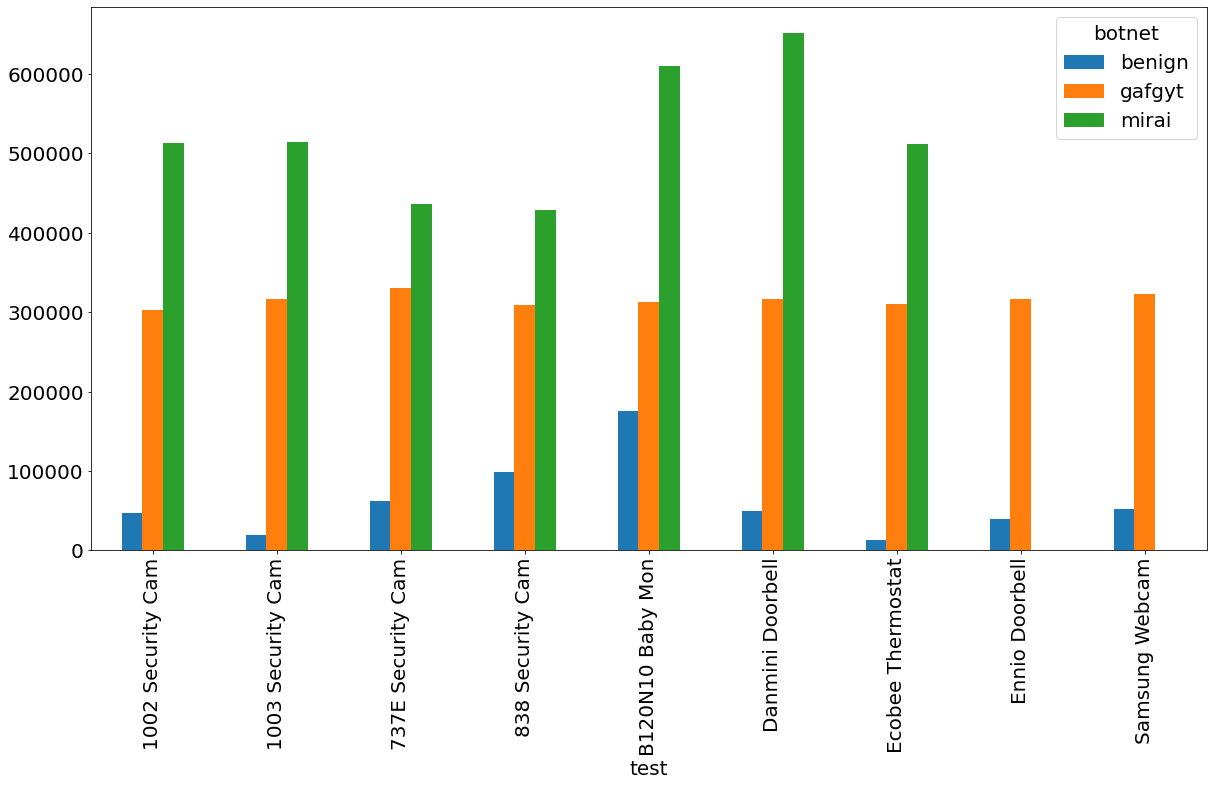

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]

nbaiot[['iot_dev','botnet']].groupby(['iot_dev','botnet']).size().unstack(level=1).plot(kind='bar', xlabel="test")

In [ ]:
nbaiot.info()

In [ ]:
nbaiot['traffic_type'].value_counts()

In [ ]:
nbaiot.isna().sum().sum()

## MODELING

In [ ]:
nbaiot.loc[ nbaiot['traffic_type']=='attack','traffic_type' ]=1
nbaiot.loc[ nbaiot['traffic_type']=='benign','traffic_type' ]=0
nbaiot['traffic_type'] = nbaiot['traffic_type'].astype(int)


In [ ]:
nbaiot['traffic_type'].value_counts()

In [ ]:
nbaiot['iot_dev'].value_counts()

In [ ]:
nbaiot = nbaiot[ nbaiot['iot_dev'] == 'Danmini_Doorbell' ]

In [ ]:
nbaiot['iot_dev'].value_counts()

In [ ]:
# All the features columns
X = nbaiot.drop( ["attack_type", "traffic_type", "iot_dev", "botnet" ], axis=1)

# Targe column
y = nbaiot["traffic_type"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

In [ ]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

In [ ]:
clfs = {
    'KNN' : KNeighborsClassifier(),
    'RFR' : RandomForestClassifier(),
    #'LRE' : LogisticRegression(),
    'SVC' : SVC(kernel='linear')
}

In [ ]:
for clfk in clfs:
    
    clf_name = clfk
    clf = clfs[clfk]
    
    print('==============',clf_name,'==============')
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('Score:', score)
    y_preds = clf.predict(X_test)
    print( classification_report(y_test, y_preds) )
    conf_mat = confusion_matrix(y_test, y_preds)
    print(conf_mat)
    plot_conf_mat(y_test, y_preds)
    plt.show()
    print('=============================')
    print('')
    

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
print( classification_report(y_test, y_preds) )
print( classification_report(y_test, y_preds) )

In [ ]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [ ]:
x = 1
y = 2

In [ ]:
print(x)
print(y)

In [17]:
dict = {
    'x' : 4,
    'y' : 5,
}

dict

{'x': 4, 'y': 5}

In [19]:
for a in dict:
    print(dict[a])

4
5
